# HELP INTERNATIONAL CLUSTERING ASSIGNMENT

## Problem Statement
HELP International is an international humanitarian NGO that is committed to fighting poverty and providing the people of backward countries with basic amenities. The recent funding programmes, they have been able to raise around $ 10 million. Now the CEO of the NGO needs to decide how to use this money strategically and effectively. The significant issues that come while making this decision are mostly related to choosing the countries that are in the direst need of aid.

## READ AND VISUALIZE DATA (EDA)

In [125]:
# IMPORT PACKAGES
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

#library for minmaxscaler
from sklearn.preprocessing import MinMaxScaler

#library for K-Means CLuster
from sklearn.cluster import KMeans

# library for Hierarchical Clustering
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cut_tree

In [126]:
# Read csv file
orig_df = pd.read_csv('Country-data.csv')
orig_df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [127]:
orig_df.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,41.108976,6.815689,46.890215,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,27.412010,2.746837,24.209589,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,0.109000,1.810000,0.065900,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,23.800000,4.920000,30.200000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,35.000000,6.320000,43.300000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,51.350000,8.600000,58.750000,22800.000000,10.750000,76.800000,3.880000,14050.000000
max,208.000000,200.000000,17.900000,174.000000,125000.000000,104.000000,82.800000,7.490000,105000.000000


In [128]:
# convert exports, health & imports columns in actual amounts from percentage provided
orig_df['exports'] = orig_df['exports'] * orig_df['gdpp'] /100 
orig_df['health'] = orig_df['health'] * orig_df['gdpp'] /100 
orig_df['imports'] = orig_df['imports'] * orig_df['gdpp'] /100 

In [129]:
#check null
orig_df.isnull().sum()

country       0
child_mort    0
exports       0
health        0
imports       0
income        0
inflation     0
life_expec    0
total_fer     0
gdpp          0
dtype: int64

In [130]:
orig_df.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,7420.618847,1056.733204,6588.352108,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,17973.885795,1801.408906,14710.810418,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,1.076920,12.821200,0.651092,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,447.140000,78.535500,640.215000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,1777.440000,321.886000,2045.580000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,7278.000000,976.940000,7719.600000,22800.000000,10.750000,76.800000,3.880000,14050.000000
max,208.000000,183750.000000,8663.600000,149100.000000,125000.000000,104.000000,82.800000,7.490000,105000.000000


In [131]:
orig_df.columns

Index(['country', 'child_mort', 'exports', 'health', 'imports', 'income',
       'inflation', 'life_expec', 'total_fer', 'gdpp'],
      dtype='object')

#### UNIVARIATE ANALYSIS

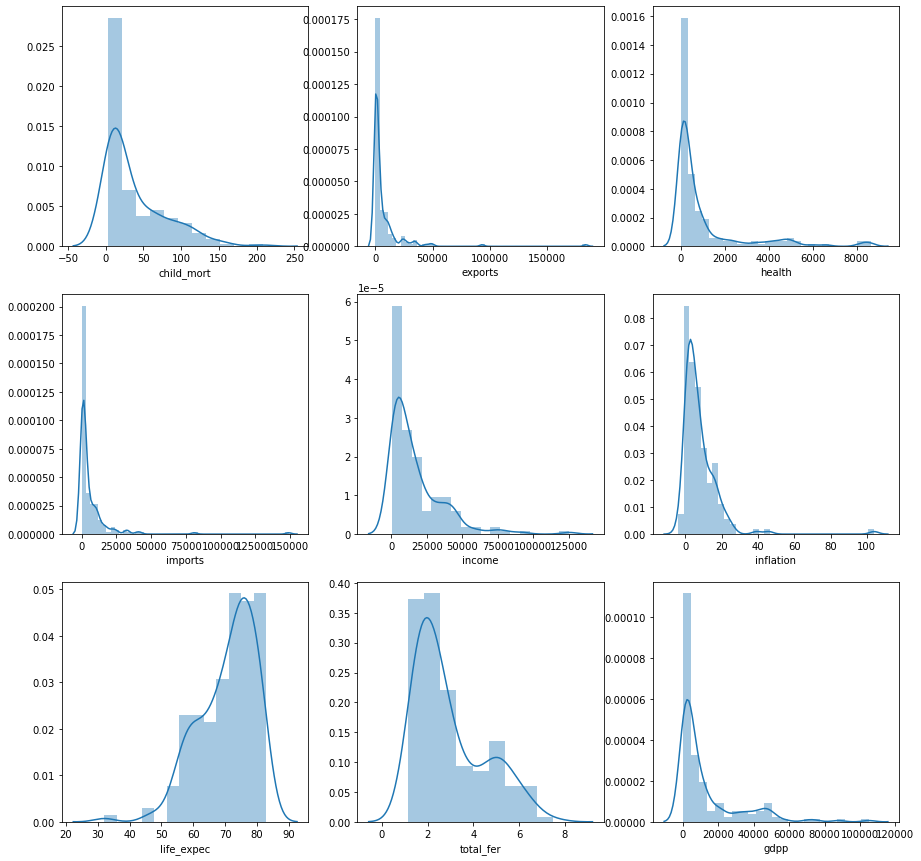

In [132]:
# distribution plot is used as all the given variables are continous
plt.figure(figsize = (15,15))
f = orig_df.columns[1:]
for i in enumerate(f):
    plt.subplot(3,3,i[0]+1)
    sns.distplot(orig_df[i[1]])

As per the above screenshot, the distribution of data is almost skewed right/left i.e., most of the data is concenrated towards lower economical back ground(underdeveloped) and some part of data towards high economic background(developed).

#### BIVARIATE ANALYSIS

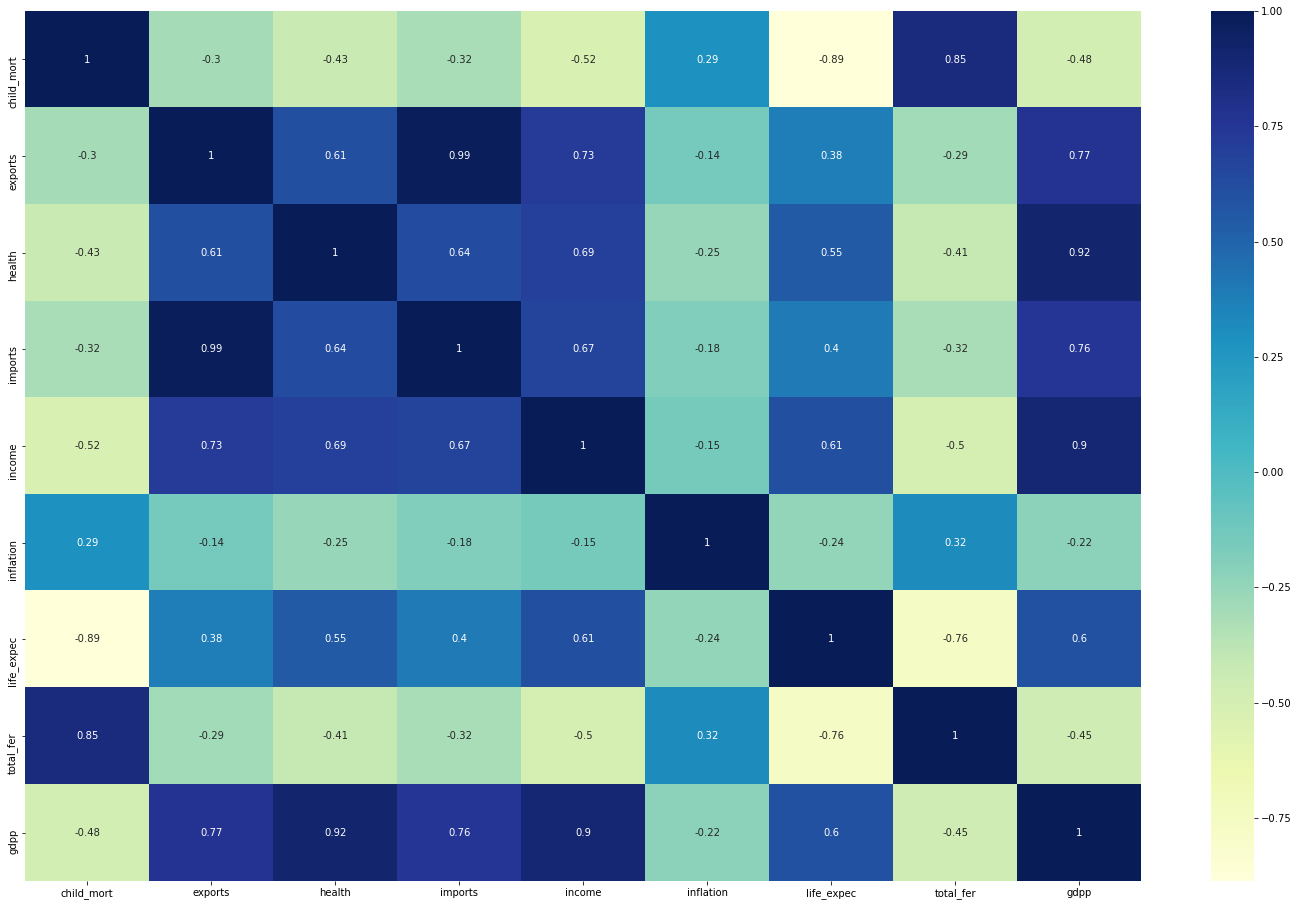

In [134]:
#correlation plot of all variables in train
plt.figure(figsize = (25, 16))
sns.heatmap(orig_df.corr(), annot = True, cmap="YlGnBu")
plt.show()

From the above correlations, we could infer that:
 * Better the exports, health, imports & income better the GDP. And we had calculated the actuals of imports, exports and health from gdpp percentages. 
 * Exports and imports are directly proportional to each other. 
 * Better the health and income, better the life expectancies. 
 * Higher the child mortality, higher the total fertility.
 * Higher the child mortaliity, lesser the life  expectancies.

# Outlier Handling

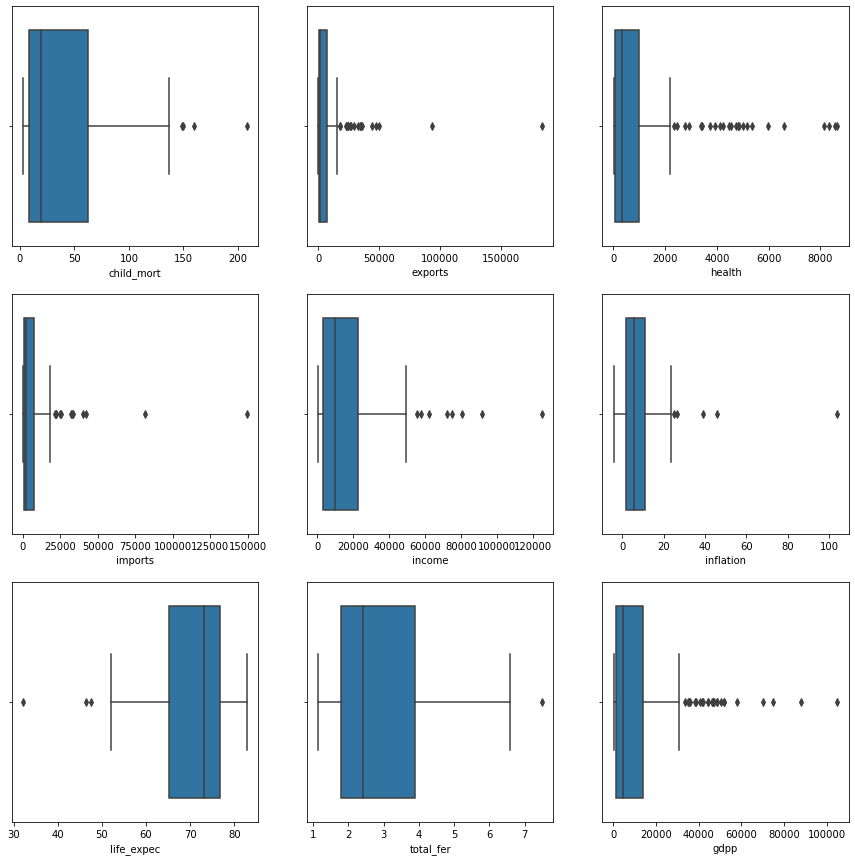

In [135]:
# box plot is used as all the given variables are continous
plt.figure(figsize = (15,15))
f = orig_df.columns[1:]
for i in enumerate(f):
    plt.subplot(3,3,i[0]+1)
    sns.boxplot(orig_df[i[1]])

Here the focus is on the usage of funds who are actually in need!!!
Child Mortality and Inflation field doesn't require treatment of high end outliers and it doesn't have lower end outliers.
Life Expectancy has low end outlier which could be ignored in outlier handling. Others should be treated accordingly which includes exports, health, imports, income, total-fer, gdpp.

In [136]:
# outliers are addressed by soft/hard capping on the countries with developed/ highly economic background
q1 = orig_df['exports'].quantile(0.98) #---46480.92800000003(0.98)
q2 = orig_df['health'].quantile(0.90) # --3825.416000000001(0.90)
q3 = orig_df['imports'].quantile(0.98) # --37651.40000000005(0.98)
q4 = orig_df['income'].quantile(0.98) # -- 74208.00000000001
q5 = orig_df['total_fer'].quantile(0.99) #-- 6.563599999999999
q6 = orig_df['gdpp'].quantile(0.97) # -- 52217.99999999989

orig_df['exports'][orig_df['exports'] > q1] = q1
orig_df['health'][orig_df['health'] > q2] = q2
orig_df['imports'][orig_df['imports'] > q3] = q3
orig_df['income'][orig_df['income'] > q4] = q4
orig_df['total_fer'][orig_df['total_fer'] > q5] = q5
orig_df['gdpp'][orig_df['gdpp'] > q6] = q6

<ipython-input-136-92e235d0b5f3>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  orig_df['exports'][orig_df['exports'] > q1] = q1
<ipython-input-136-92e235d0b5f3>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  orig_df['health'][orig_df['health'] > q2] = q2
<ipython-input-136-92e235d0b5f3>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  orig_df['imports'][orig_df['imports'] > q3] = q3
<ipython-input-136-92e235d0b5f3>:12: SettingWi

In [137]:
orig_df.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,6289.293770,861.783815,5621.491629,16691.586826,7.781832,70.555689,2.942259,12158.107784
std,40.328931,10300.975178,1214.790294,8288.734433,17371.772696,10.570704,8.893172,1.498340,15557.218760
min,2.600000,1.076920,12.821200,0.651092,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,447.140000,78.535500,640.215000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,1777.440000,321.886000,2045.580000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,7278.000000,976.940000,7719.600000,22800.000000,10.750000,76.800000,3.880000,14050.000000
max,208.000000,46480.928000,3825.416000,37651.400000,74208.000000,104.000000,82.800000,6.563600,52218.000000


## Hopkins Score

In [138]:
#Calculating the Hopkins statistic
from sklearn.neighbors import NearestNeighbors
from random import sample
from numpy.random import uniform
import numpy as np
from math import isnan
 
def hopkins(X):
    d = X.shape[1]
    #d = len(vars) # columns
    n = len(X) # rows
    m = int(0.1 * n) 
    nbrs = NearestNeighbors(n_neighbors=1).fit(X.values)
 
    rand_X = sample(range(0, n, 1), m)
 
    ujd = []
    wjd = []
    for j in range(0, m):
        u_dist, _ = nbrs.kneighbors(uniform(np.amin(X,axis=0),np.amax(X,axis=0),d).reshape(1, -1), 2, return_distance=True)
        ujd.append(u_dist[0][1])
        w_dist, _ = nbrs.kneighbors(X.iloc[rand_X[j]].values.reshape(1, -1), 2, return_distance=True)
        wjd.append(w_dist[0][1])
 
    H = sum(ujd) / (sum(ujd) + sum(wjd))
    if isnan(H):
        print(ujd, wjd)
        H = 0
 
    return H

In [140]:
hopkins(orig_df.drop('country', axis =1))

0.9180840463845031

By running the hopkins score multiple times, we see the values in the range of 86-94%

# Scaling

In [141]:
scaler= MinMaxScaler()
scaled_df = scaler.fit_transform(orig_df.drop('country', axis =1))
scaled_df

array([[0.42648491, 0.00116659, 0.0076316 , ..., 0.47534517, 0.86264223,
        0.00619386],
       [0.06815969, 0.02461546, 0.06690294, ..., 0.87179487, 0.09235998,
        0.0742301 ],
       [0.12025316, 0.03682376, 0.0454181 , ..., 0.87573964, 0.32141274,
        0.08134726],
       ...,
       [0.10077897, 0.02026949, 0.02013925, ..., 0.8086785 , 0.14777597,
        0.02075519],
       [0.26144109, 0.00843211, 0.01443552, ..., 0.69822485, 0.65021428,
        0.02075519],
       [0.39191821, 0.01159907, 0.01919239, ..., 0.39250493, 0.78505985,
        0.02364053]])

In [142]:
# change the scaled_df into a dataframe
scaled_df= pd.DataFrame(scaled_df)
scaled_df.columns = orig_df.columns[1:]
scaled_df.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,0.426485,0.001167,0.007632,0.006577,0.013601,0.126144,0.475345,0.862642,0.006194
1,0.068160,0.024615,0.066903,0.052777,0.126646,0.080399,0.871795,0.092360,0.074230
2,0.120253,0.036824,0.045418,0.037178,0.167000,0.187691,0.875740,0.321413,0.081347
3,0.566699,0.047292,0.023025,0.040204,0.071890,0.245911,0.552268,0.925447,0.063458
4,0.037488,0.119405,0.189592,0.190837,0.251240,0.052213,0.881657,0.181026,0.230231


# K- Means Clustering

Text(0.5, 1.0, 'Silhoutte analysis')

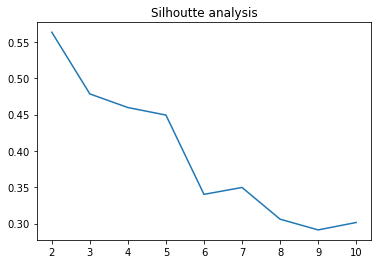

In [170]:
from sklearn.metrics import silhouette_score
ss = []
for k in range(2,11):
    kmean = KMeans(n_clusters = k).fit(scaled_df)
    ss.append([k, silhouette_score(scaled_df, kmean.labels_)])

sil =pd.DataFrame(ss)
plt.plot(sil[0], sil[1])
plt.title('Silhoutte analysis')

Text(0.5, 1.0, 'ELbow curve')

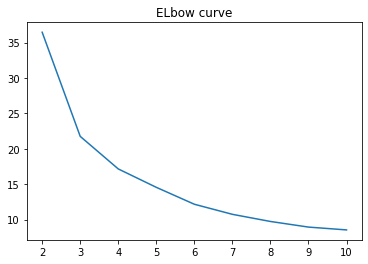

In [171]:
## Elbow Cuve
ssd = []
for k in range(2,11):
    kmean = KMeans(n_clusters = k).fit(scaled_df)
    ssd.append([k, kmean.inertia_])
    
ssd = pd.DataFrame(ssd)
plt.plot(ssd[0], ssd[1])
plt.title('ELbow curve')

As per Sumit's suggestion, the Highest value should be taken from Silhoutte graph and the elbow point should be taken for the optimal K value. There by from the above graphs, we could conclude the optimal K is 3.

# K Means (K=3)

In [145]:
kmean = KMeans(n_clusters = 3, random_state = 0)
kmean.fit(scaled_df)

KMeans(n_clusters=3, random_state=0)

In [146]:
kmean.labels_

array([0, 1, 1, 0, 1, 1, 1, 2, 2, 1, 2, 1, 1, 1, 1, 2, 1, 0, 1, 1, 1, 1,
       1, 2, 1, 0, 0, 1, 0, 2, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 2, 1,
       2, 1, 1, 1, 1, 0, 0, 1, 1, 2, 2, 0, 0, 1, 2, 0, 2, 1, 1, 0, 0, 1,
       0, 1, 2, 1, 1, 1, 0, 2, 2, 2, 1, 2, 1, 1, 0, 0, 2, 1, 0, 1, 1, 0,
       0, 1, 1, 2, 1, 0, 0, 1, 1, 0, 2, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1,
       2, 2, 0, 0, 2, 1, 0, 1, 1, 1, 1, 1, 2, 2, 1, 1, 0, 1, 1, 0, 1, 1,
       0, 2, 1, 2, 0, 1, 1, 2, 1, 1, 0, 1, 2, 2, 1, 0, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 2, 2, 2, 1, 1, 1, 1, 1, 0, 0])

In [147]:
## Adding the labels with the original DF
orig_df['cluster_id'] = kmean.labels_
orig_df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_id
0,Afghanistan,90.2,55.30,41.9174,248.297,1610.0,9.44,56.2,5.82,553.0,0
1,Albania,16.6,1145.20,267.8950,1987.740,9930.0,4.49,76.3,1.65,4090.0,1
2,Algeria,27.3,1712.64,185.9820,1400.440,12900.0,16.10,76.5,2.89,4460.0,1
3,Angola,119.0,2199.19,100.6050,1514.370,5900.0,22.40,60.1,6.16,3530.0,0
4,Antigua and Barbuda,10.3,5551.00,735.6600,7185.800,19100.0,1.44,76.8,2.13,12200.0,1


In [148]:
# Check the number of Data Points in each cluster
orig_df.cluster_id.value_counts()

1    88
0    46
2    33
Name: cluster_id, dtype: int64

Eventhough the distribution is not balanced perfectly, the further addition of cluster makes further split in the '2' cluster. And,hence I go forward by keeping the optimal k = 3.

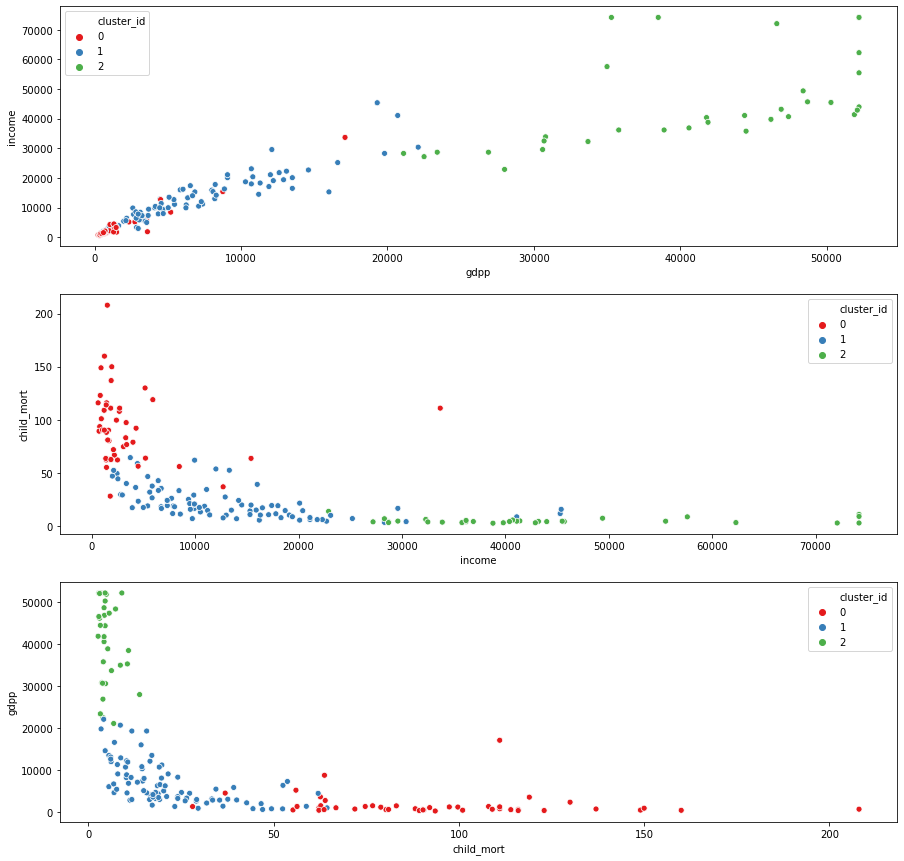

In [149]:
#GDPP vs Income vs child_mort
plt.figure(figsize = (15, 15))
plt.subplot(3,1,1)
sns.scatterplot(x = 'gdpp', y = 'income', hue = 'cluster_id', data = orig_df, palette ='Set1')
plt.subplot(3,1,2)
sns.scatterplot(x = 'income', y = 'child_mort', hue = 'cluster_id', data = orig_df, palette ='Set1')
plt.subplot(3,1,3)
sns.scatterplot(x = 'child_mort', y = 'gdpp', hue = 'cluster_id', data = orig_df, palette ='Set1')

From the above graphs, We see that 0 shows the signs of lower economic countries and 1 shows the signs of developing countries and 2 shows the signs the developed countries.

# Cluster Profiling

In [150]:
# check the characteristics of each cluster
orig_df[['income','gdpp','child_mort','cluster_id']].groupby('cluster_id').mean()

,income,gdpp,child_mort
cluster_id,,,
0,3516.804348,1695.913043,93.284783
1,13173.750000,6913.659091,21.923864
2,44437.333333,40726.969697,5.172727


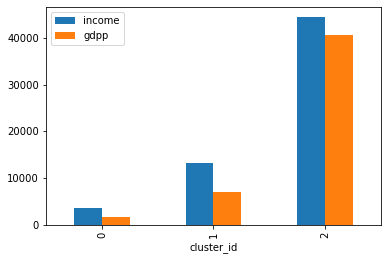

In [151]:

orig_df[['income','gdpp','cluster_id']].groupby('cluster_id').mean().plot(kind = 'bar')

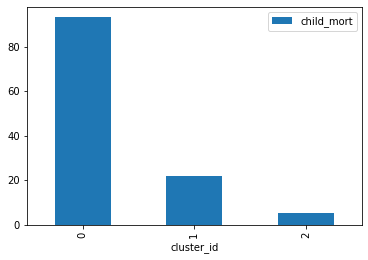

In [152]:
orig_df[['child_mort','cluster_id']].groupby('cluster_id').mean().plot(kind = 'bar')

From the above output, we could label the clusters as

 * 0  - Underdeveloped
 * 1  - Developing
 * 2  - Developed

### Countries to be which needs most attention

In [153]:
# filtering the under developed countries
ud = orig_df[orig_df['cluster_id']==0]

In [169]:
ud[['country' ,'gdpp','child_mort','income']].sort_values(by = [ 'gdpp','child_mort','income'], ascending = [True, False, True]).head(10)

,country,gdpp,child_mort,income
26,Burundi,231.0,93.6,764.0
88,Liberia,327.0,89.3,700.0
37,"Congo, Dem. Rep.",334.0,116.0,609.0
112,Niger,348.0,123.0,814.0
132,Sierra Leone,399.0,160.0,1220.0
93,Madagascar,413.0,62.2,1390.0
106,Mozambique,419.0,101.0,918.0
31,Central African Republic,446.0,149.0,888.0
94,Malawi,459.0,90.5,1030.0
50,Eritrea,482.0,55.2,1420.0


Countries which require utmost funds based on gdpp, child_mort and income as per K means clustering where k=3 are 
 * Burundi
 * Liberia
 * Congo, Dem. Rep.	
 * Niger	
 * Sierra Leone
 * Madagascar
 * Mozambique
 * Central African Republic
 * Malawi
 * Eritrea

# Hierarchical Clustering

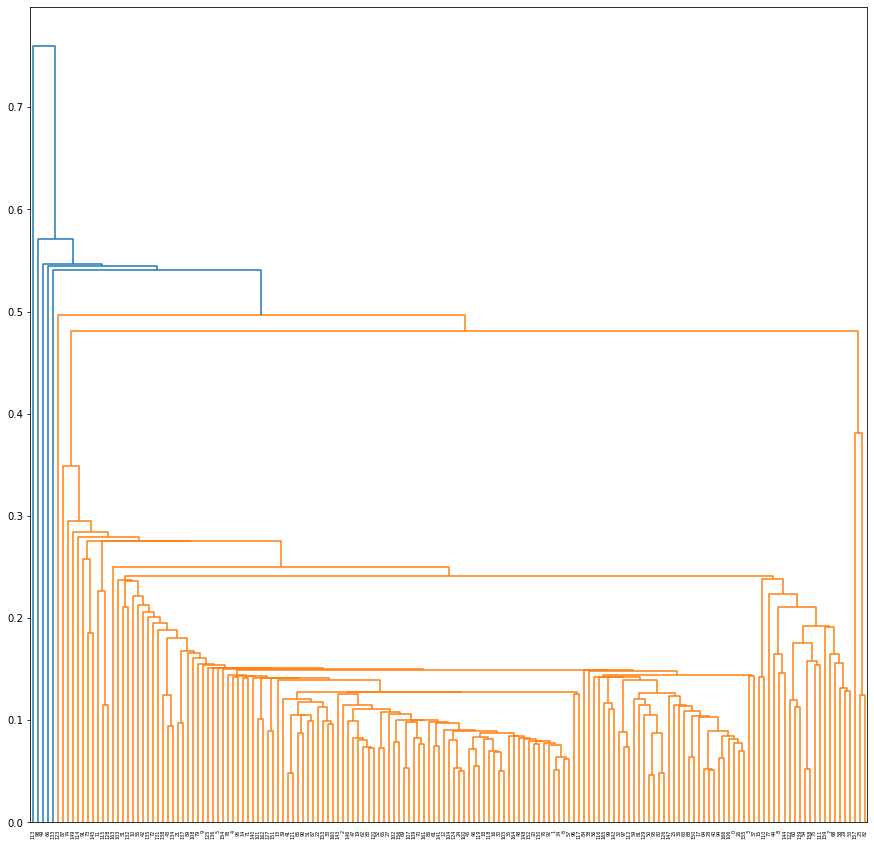

In [155]:
# single linkage with normalized values
mergings_sim = linkage(scaled_df, method="single", metric='euclidean')
plt.figure(figsize = (15,15))
dendrogram(mergings_sim)
plt.show()

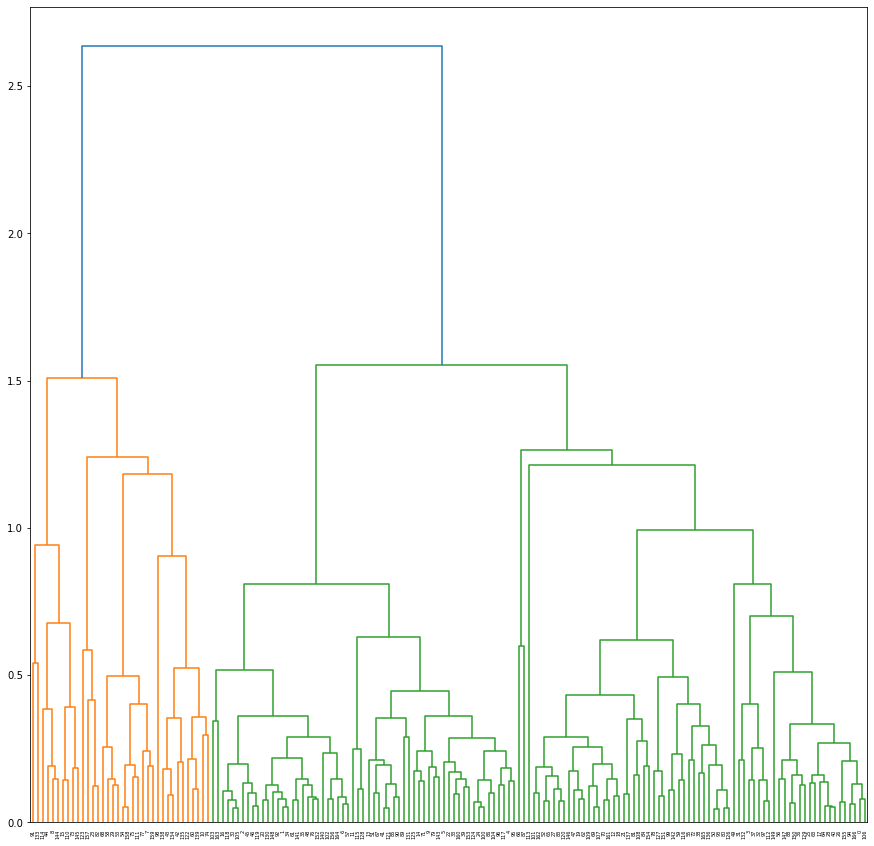

In [156]:
# complete linkage with normalized values
mergings_com = linkage(scaled_df, method="complete", metric='euclidean')
plt.figure(figsize = (15,15))
dendrogram(mergings_com)
plt.show()

Complete Linkage looks to better than Simple linkage as the distribution in simple is concenrated to one end and in complex the categories are distributed better.

In [157]:
# 3 clusters as making as 4 cluster would make one smaller cluster to very small 2 clusters
cluster_labels = cut_tree(mergings_com, n_clusters=3).reshape(-1, )
cluster_labels

array([0, 1, 1, 0, 1, 1, 1, 2, 2, 1, 2, 1, 0, 1, 1, 2, 1, 0, 0, 0, 1, 0,
       1, 2, 1, 0, 0, 0, 0, 2, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 2, 2,
       2, 1, 1, 0, 1, 0, 0, 1, 0, 2, 2, 0, 0, 1, 2, 0, 2, 1, 0, 0, 0, 0,
       0, 1, 2, 0, 0, 1, 0, 2, 2, 2, 1, 2, 0, 1, 0, 0, 2, 0, 0, 1, 1, 0,
       0, 1, 1, 2, 1, 0, 0, 1, 1, 0, 2, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0,
       2, 2, 0, 0, 2, 1, 0, 1, 1, 1, 0, 1, 2, 2, 1, 1, 0, 0, 1, 0, 1, 1,
       0, 2, 2, 2, 0, 0, 2, 2, 1, 1, 0, 1, 2, 2, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 1, 2, 2, 2, 1, 0, 0, 1, 1, 0, 0])

In [158]:
# assign cluster labels
orig_df['cluster_id_hier'] = cluster_labels
orig_df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_id,cluster_id_hier
0,Afghanistan,90.2,55.30,41.9174,248.297,1610.0,9.44,56.2,5.82,553.0,0,0
1,Albania,16.6,1145.20,267.8950,1987.740,9930.0,4.49,76.3,1.65,4090.0,1,1
2,Algeria,27.3,1712.64,185.9820,1400.440,12900.0,16.10,76.5,2.89,4460.0,1,1
3,Angola,119.0,2199.19,100.6050,1514.370,5900.0,22.40,60.1,6.16,3530.0,0,0
4,Antigua and Barbuda,10.3,5551.00,735.6600,7185.800,19100.0,1.44,76.8,2.13,12200.0,1,1


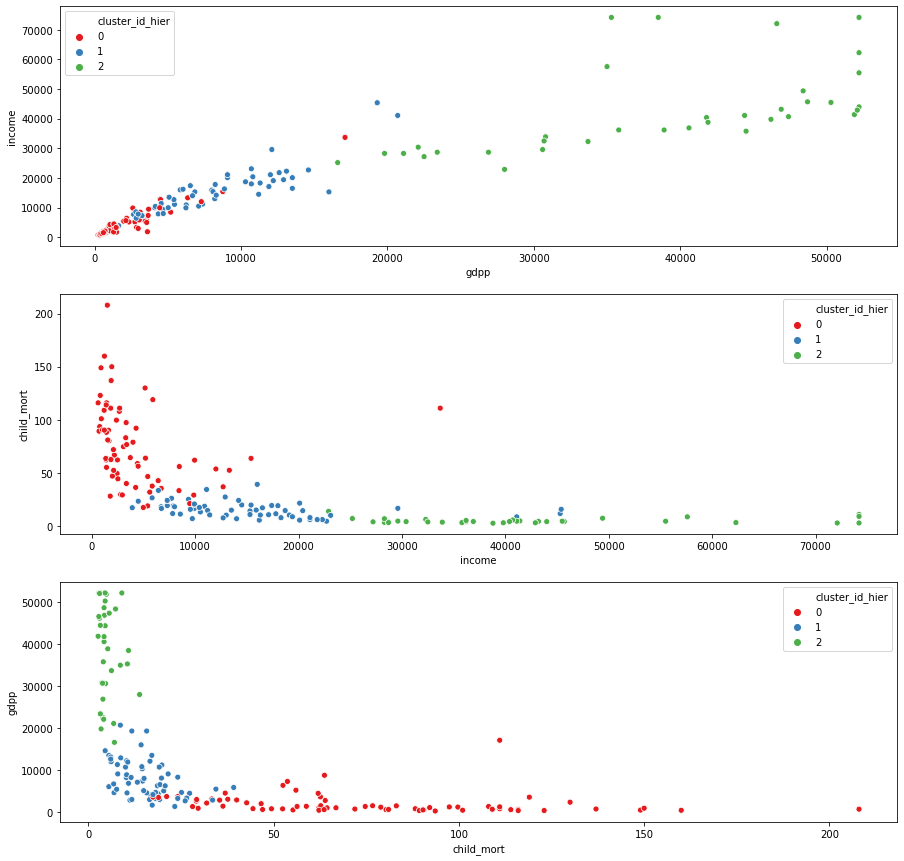

In [159]:
#GDPP vs Income vs child_mort
plt.figure(figsize = (15, 15))
plt.subplot(3,1,1)
sns.scatterplot(x = 'gdpp', y = 'income', hue = 'cluster_id_hier', data = orig_df, palette ='Set1')
plt.subplot(3,1,2)
sns.scatterplot(x = 'income', y = 'child_mort', hue = 'cluster_id_hier', data = orig_df, palette ='Set1')
plt.subplot(3,1,3)
sns.scatterplot(x = 'child_mort', y = 'gdpp', hue = 'cluster_id_hier', data = orig_df, palette ='Set1')

In [160]:
# check the characteristics of each cluster
orig_df[['income','gdpp','child_mort','cluster_id_hier']].groupby('cluster_id_hier').mean()

,income,gdpp,child_mort
cluster_id_hier,,,
0,4328.471429,2022.628571,74.984286
1,15314.262295,7972.622951,15.688525
2,43064.777778,38958.055556,5.144444


In [161]:
# Check the number of Data Points in each cluster
orig_df.cluster_id_hier.value_counts()

0    70
1    61
2    36
Name: cluster_id_hier, dtype: int64

# Cluster Profiling

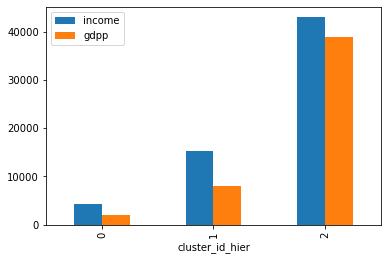

In [162]:
orig_df[['income','gdpp','cluster_id_hier']].groupby('cluster_id_hier').mean().plot(kind = 'bar')

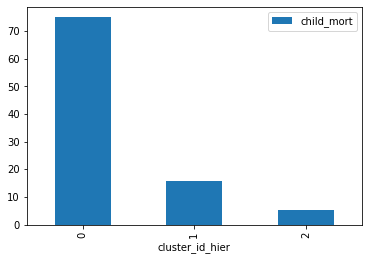

In [163]:
orig_df[['child_mort','cluster_id_hier']].groupby('cluster_id_hier').mean().plot(kind = 'bar')

From the above output, we could label the clusters as

 -- 0  - Underdeveloped
 -- 1  - Developing
 -- 2  - Developed

#### Countries which needs attention

In [165]:
# filtering the under developed countries
udh = orig_df[orig_df['cluster_id_hier']==0]

In [167]:
udh[['country','gdpp','child_mort','income']].sort_values(by = [ 'gdpp','child_mort','income',], ascending = [True, False, True]).head(10)

,country,gdpp,child_mort,income
26,Burundi,231.0,93.6,764.0
88,Liberia,327.0,89.3,700.0
37,"Congo, Dem. Rep.",334.0,116.0,609.0
112,Niger,348.0,123.0,814.0
132,Sierra Leone,399.0,160.0,1220.0
93,Madagascar,413.0,62.2,1390.0
106,Mozambique,419.0,101.0,918.0
31,Central African Republic,446.0,149.0,888.0
94,Malawi,459.0,90.5,1030.0
50,Eritrea,482.0,55.2,1420.0


Countries which require utmost funds based on gdpp, child_mort and income as per hierarchical clustering complete linkage are 
 * Burundi
 * Liberia
 * Congo, Dem. Rep.	
 * Niger	
 * Sierra Leone
 * Madagascar
 * Mozambique
 * Central African Republic
 * Malawi
 * Eritrea